2. 제품 200개의 Lot별 불량 제품 수량 데이터에 대해 p관리도를 구하고 시각화하시오.\
(1) p관리도에 따라 중심선(center line), 관리 상한선, 하한선을 구하시오.\
(2) 관리도를 시각화하시오.

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv("lot_quality.csv")
data

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,lot,생산수량,불량수량
0,1,587,19
1,2,588,15
2,3,455,19
3,4,666,12
4,5,750,15
...,...,...,...
195,196,631,18
196,197,565,21
197,198,570,12
198,199,517,10


n:lot별 생산수량\
p:lot별 불량비율(%)\
cl(관리중심선):전체불량수량/전체생산수량\
관리상하한선:p+-3*(p*(1-p)/n)**0.5

In [4]:
data["p"]=data["불량수량"]/data["생산수량"]
data['UCL']=data['p']+(3*(data['p']*(1-data['p'])/data["생산수량"])**0.5)
data['LCL']=data['p']-(3*(data['p']*(1-data['p'])/data["생산수량"])**0.5)

In [5]:
cl=data['불량수량'].sum()/data['생산수량'].sum()

In [6]:
print(cl)

0.029024320840935338


In [8]:
data

,lot,생산수량,불량수량,p,UCL,LCL
0,1,587,19,0.032368,0.054282,0.010454
1,2,588,15,0.025510,0.045017,0.006004
2,3,455,19,0.041758,0.069892,0.013625
3,4,666,12,0.018018,0.033481,0.002555
4,5,750,15,0.020000,0.035336,0.004664
...,...,...,...,...,...,...
195,196,631,18,0.028526,0.048407,0.008645
196,197,565,21,0.037168,0.061044,0.013292
197,198,570,12,0.021053,0.039092,0.003013
198,199,517,10,0.019342,0.037514,0.001171


In [9]:
##plot

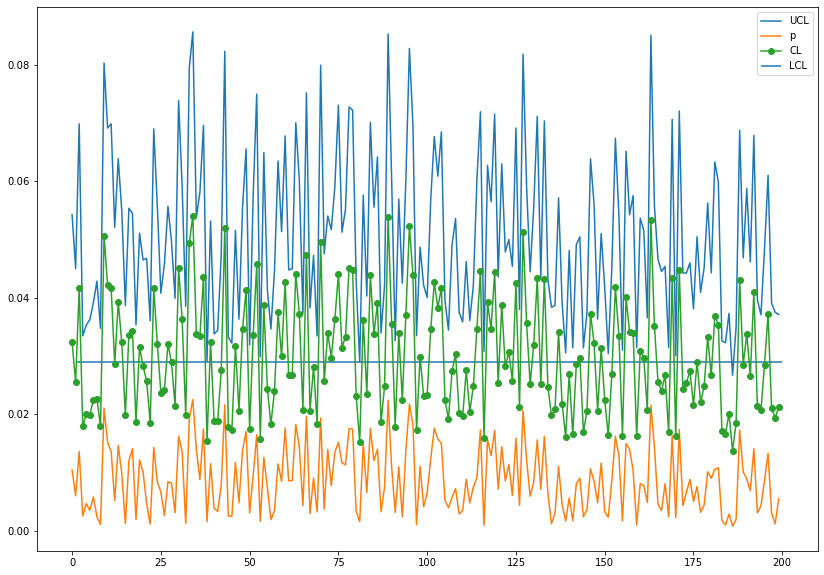

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot(data['UCL'])
plt.plot(data['LCL'])
plt.plot(data['p'], marker='o')
#관리중심선 표시
plt.hlines(cl, 1, 200)
plt.legend(['UCL', 'p', 'CL', 'LCL'])